In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
iris = sns.load_dataset('iris')

#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris.shape  #no of rows and cols

(150, 5)

In [5]:
iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.isnull().values.any()   #figuring out existence of null values

False

In [8]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
iris['species'].value_counts()   # number of rows for each target variable

,count
species,
setosa,50
versicolor,50
virginica,50


Text(0, 0.5, 'Flower species')

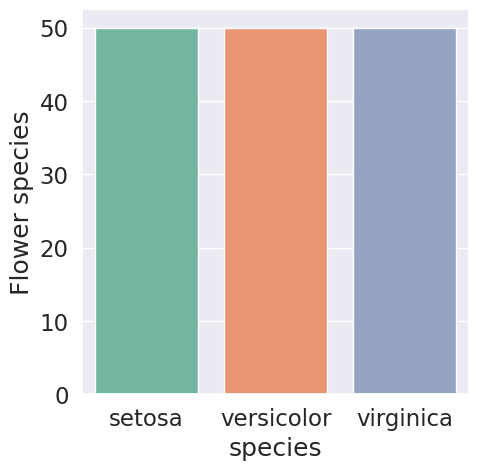

In [10]:
plt.figure(figsize=(5,5))
sns.set(font_scale = 1.5)
sns.countplot(x = 'species', data=iris, palette="Set2")
plt.ylabel('Flower species')

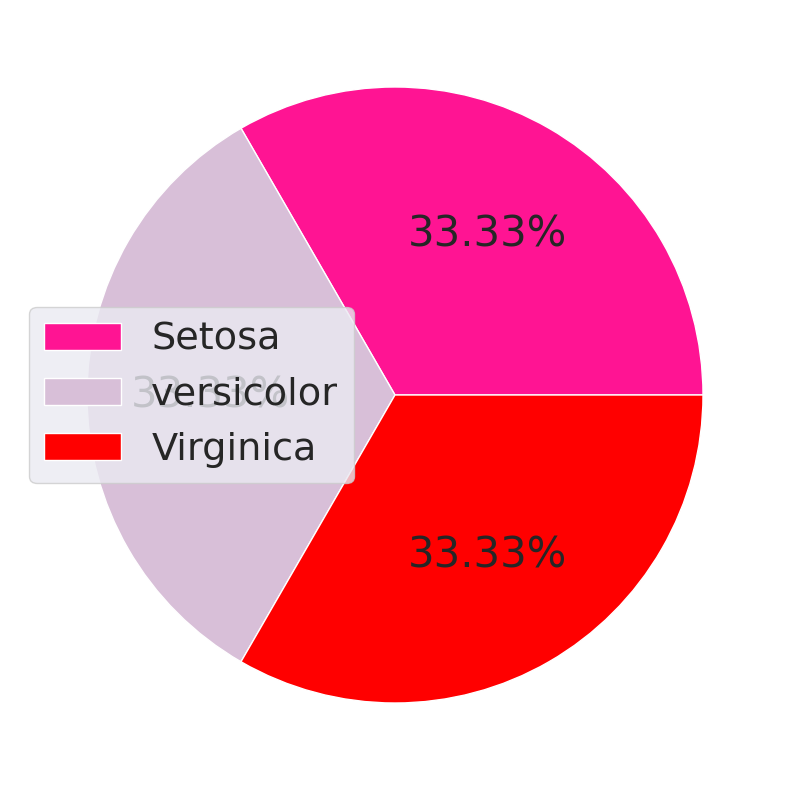

In [11]:
plt.figure(figsize=(10,10))
pienew = iris['species'].value_counts()
#explode = (0.05, 0)
colors = ['deeppink', 'thistle','red']
labels = ['Setosa','versicolor','Virginica']
sns.set(font_scale = 2.5)
plt.pie(pienew, autopct = "%.2f%%",  colors = colors)
plt.legend(labels, loc = 'best')

In [12]:
iris[iris['sepal_length'] ==0 ]   # no missing values

,sepal_length,sepal_width,petal_length,petal_width,species


In [13]:
iris[iris['petal_length'] ==0 ]   # no missing values

,sepal_length,sepal_width,petal_length,petal_width,species


In [14]:
iris[iris['sepal_width'] ==0 ]   # no missing values

,sepal_length,sepal_width,petal_length,petal_width,species


In [15]:
iris[iris['petal_width'] ==0 ]   # no missing values

,sepal_length,sepal_width,petal_length,petal_width,species


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

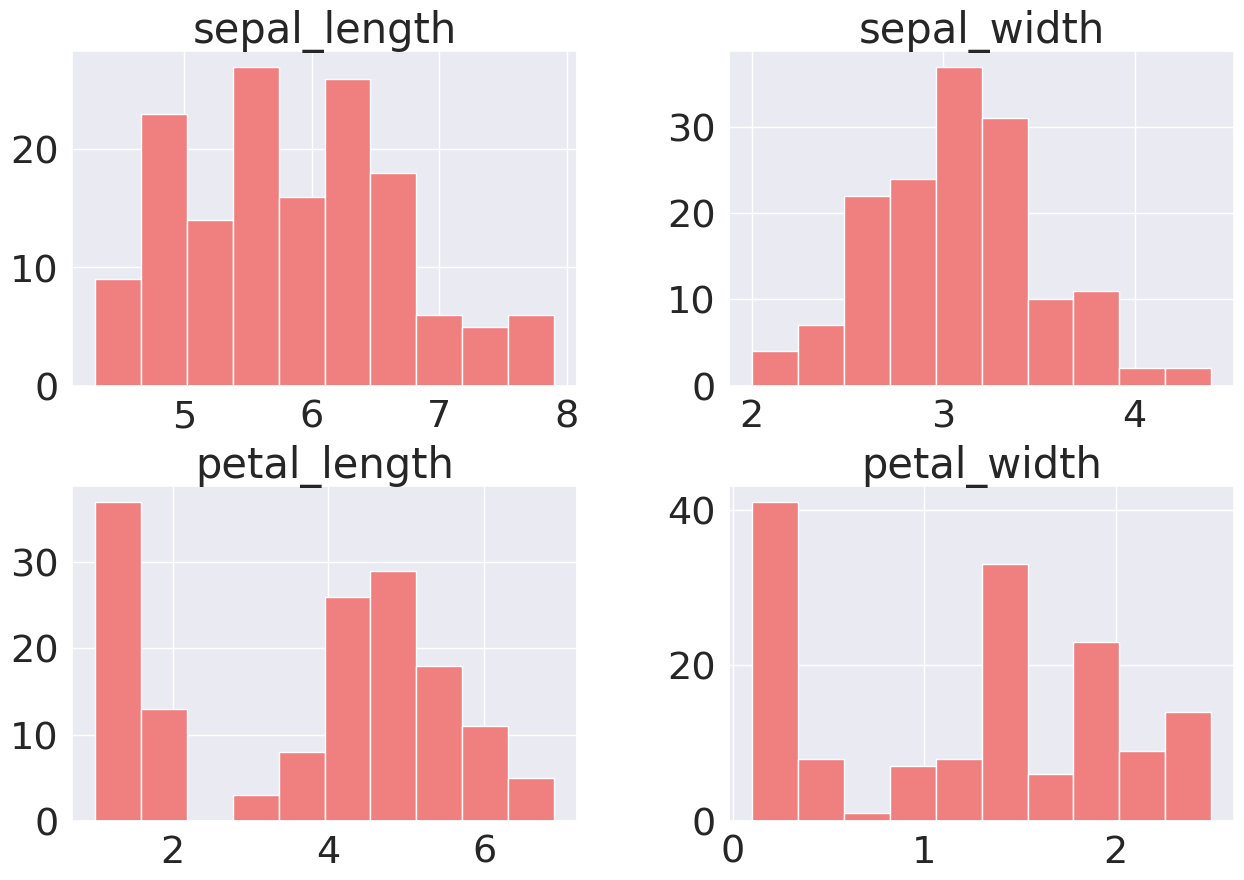

In [16]:
#Visualization for understanding and analysing the distribution of data for different variables

iris.hist(figsize = (15,10),grid=True,color = 'lightcoral')

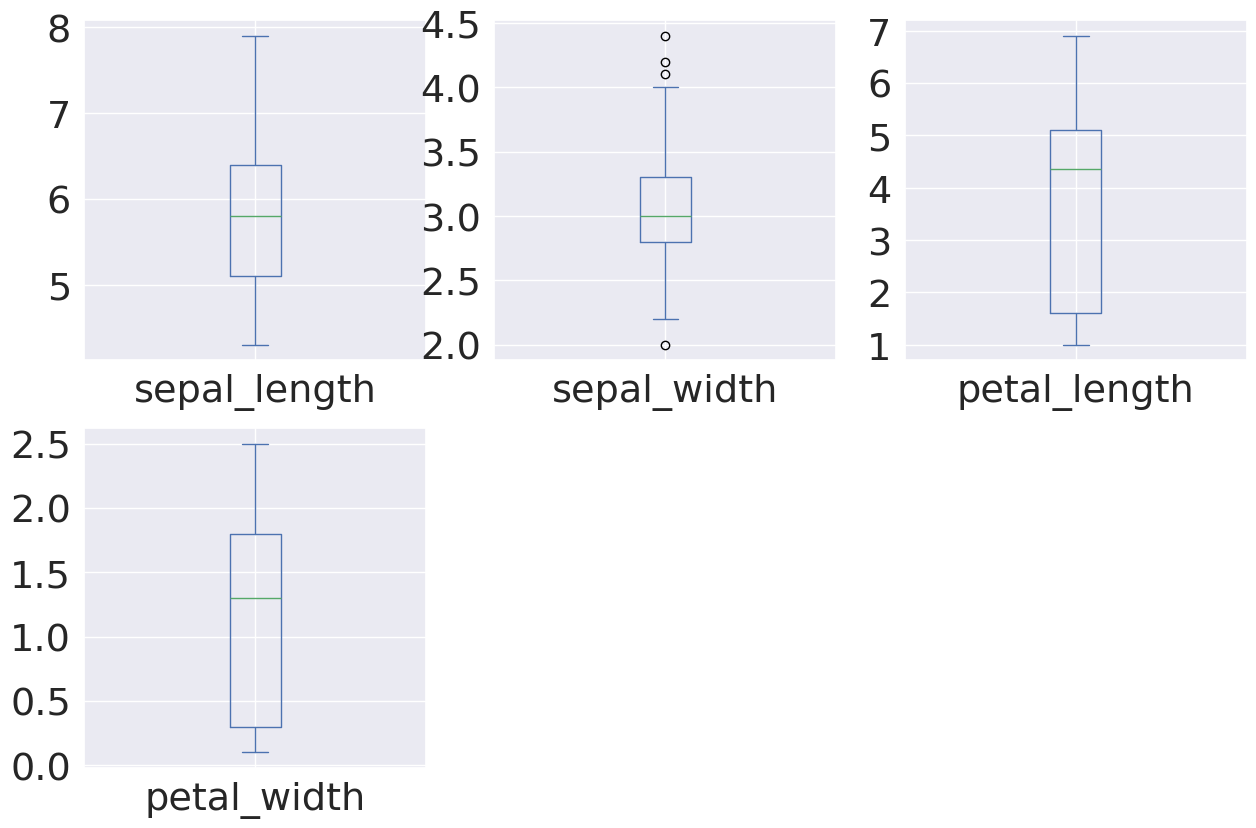

In [17]:
iris.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

<Axes: xlabel='petal_width', ylabel='Density'>

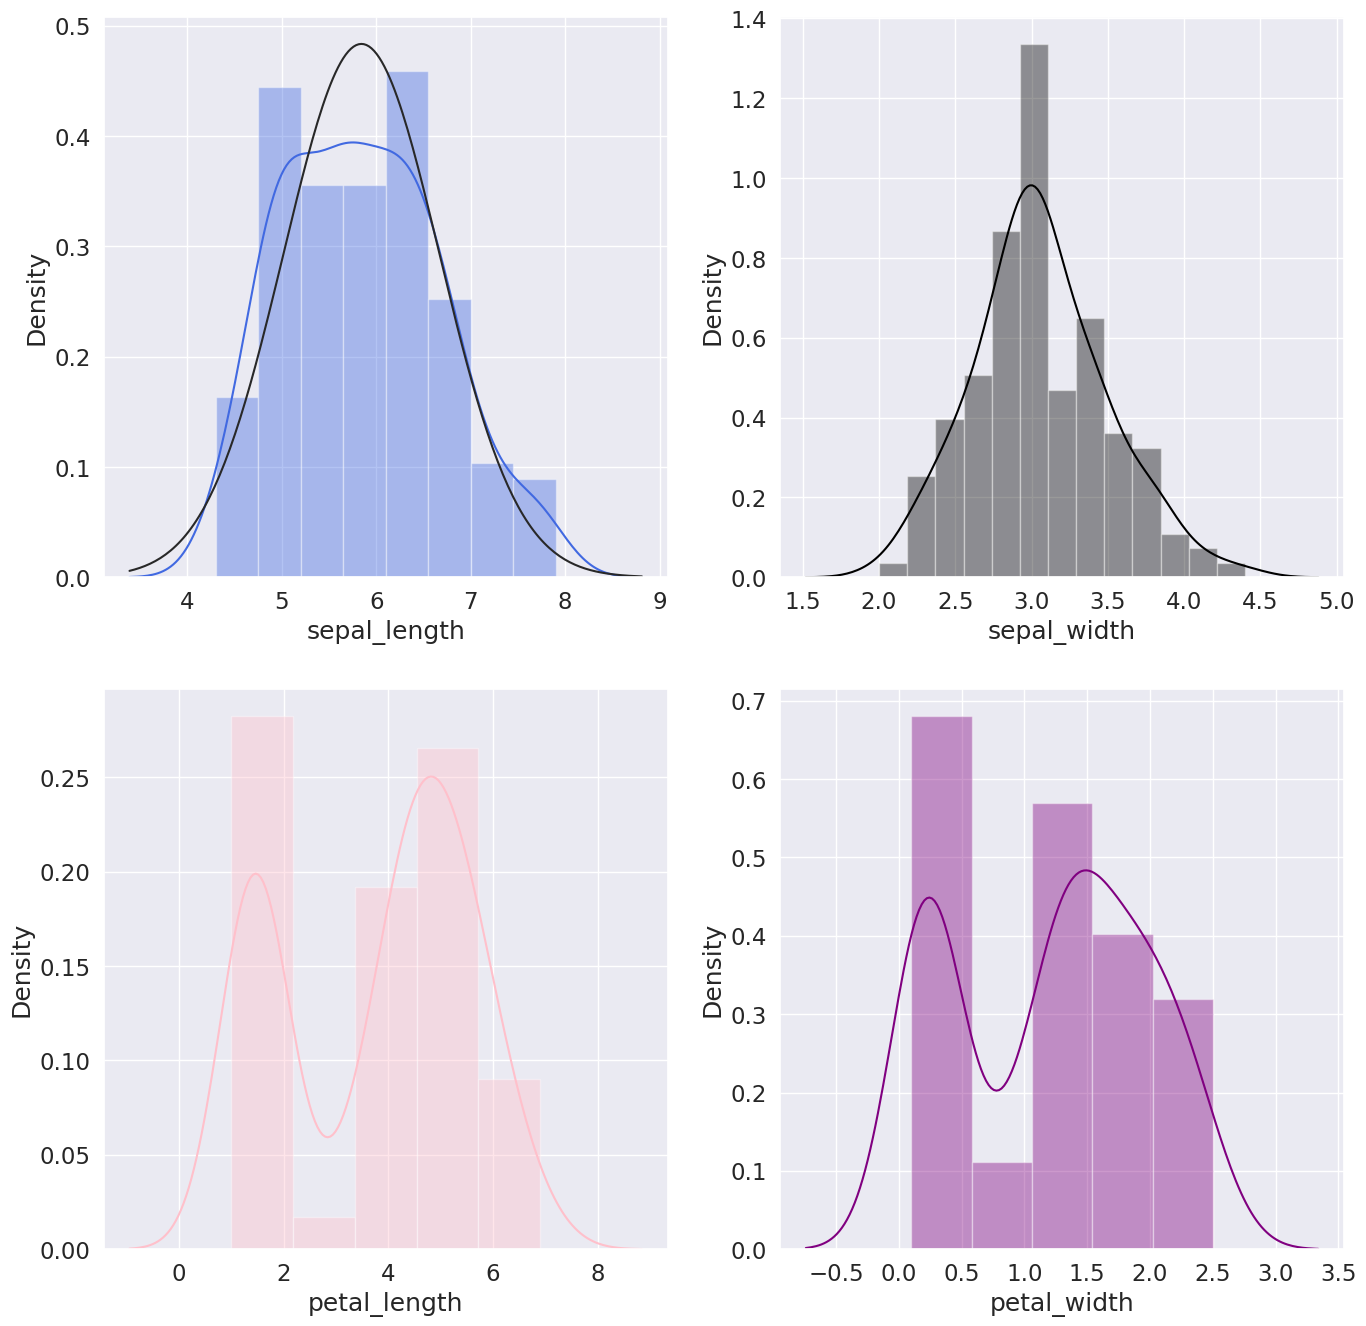

In [18]:
from scipy.stats import norm
fig, ax = plt.subplots(2,2, figsize=(16,16))
sns.set(font_scale = 1)
sns.distplot(iris.sepal_length, ax = ax[0,0], fit = norm, color = 'royalblue')
sns.distplot(iris.sepal_width, ax = ax[0,1], color = 'black')
sns.distplot(iris.petal_length, ax = ax[1,0], color = 'pink')
sns.distplot(iris.petal_width, ax = ax[1,1], color = 'purple')

In [20]:
# Select only numerical columns for correlation calculation
numerical_iris = iris.select_dtypes(include=np.number)

# Calculate correlation for numerical columns
corr = numerical_iris.corr()

# Display the correlation matrix
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

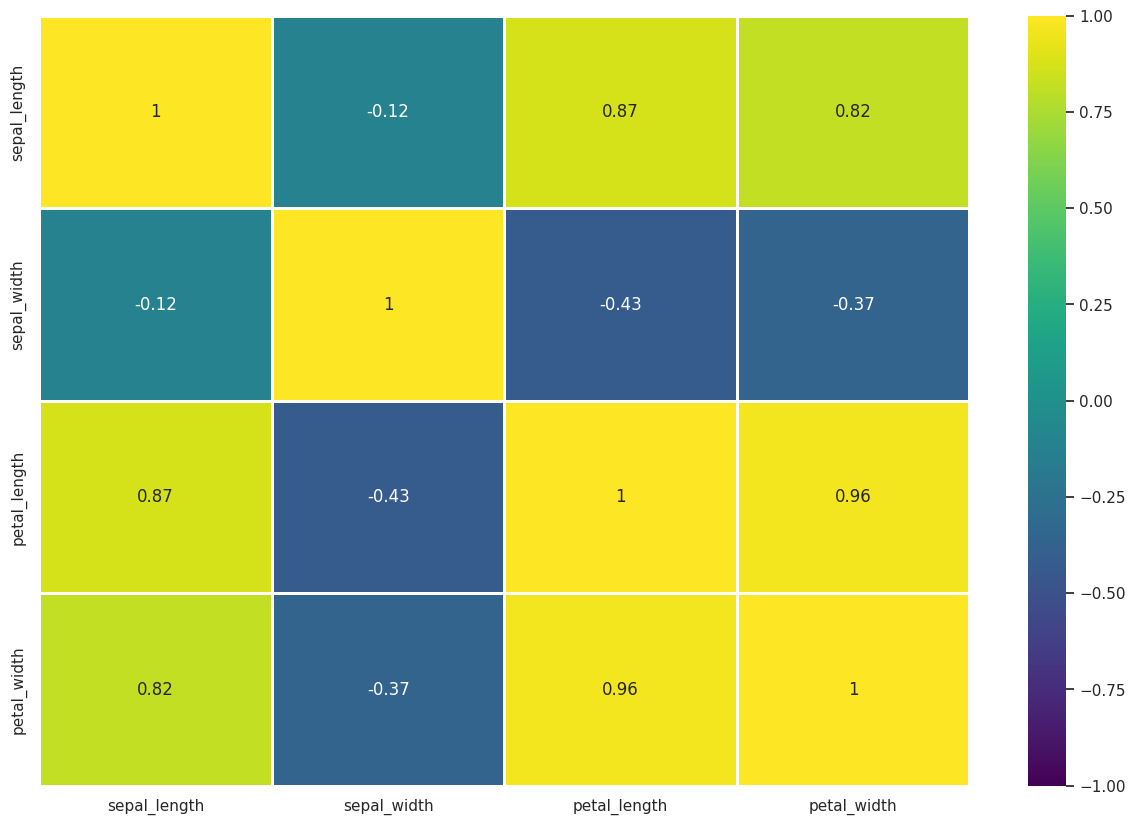

In [21]:
# heat map

plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
sns.heatmap(corr, annot = True, cmap = 'viridis', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

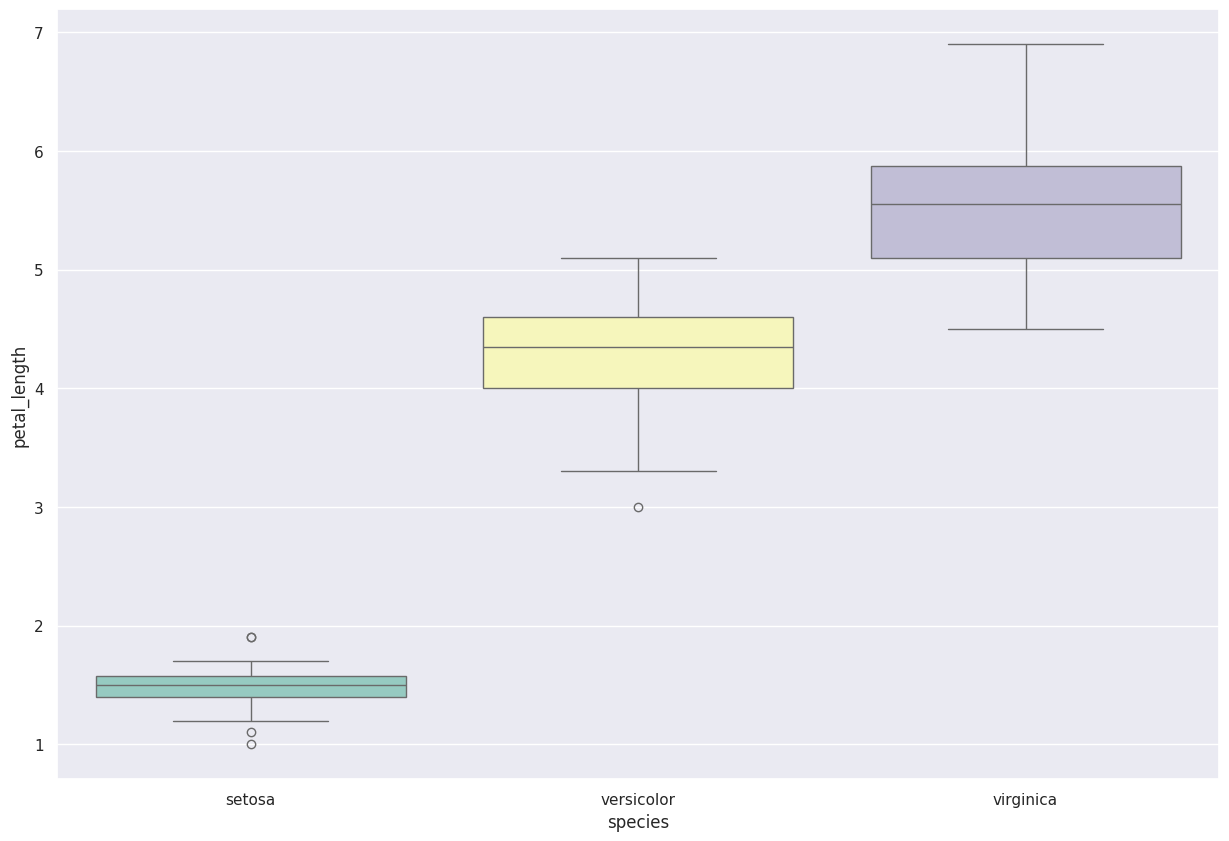

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x=iris['species'], y=iris['petal_length'], palette="Set3") # Pass x and y as named arguments
sns.set(font_scale = 1.5)

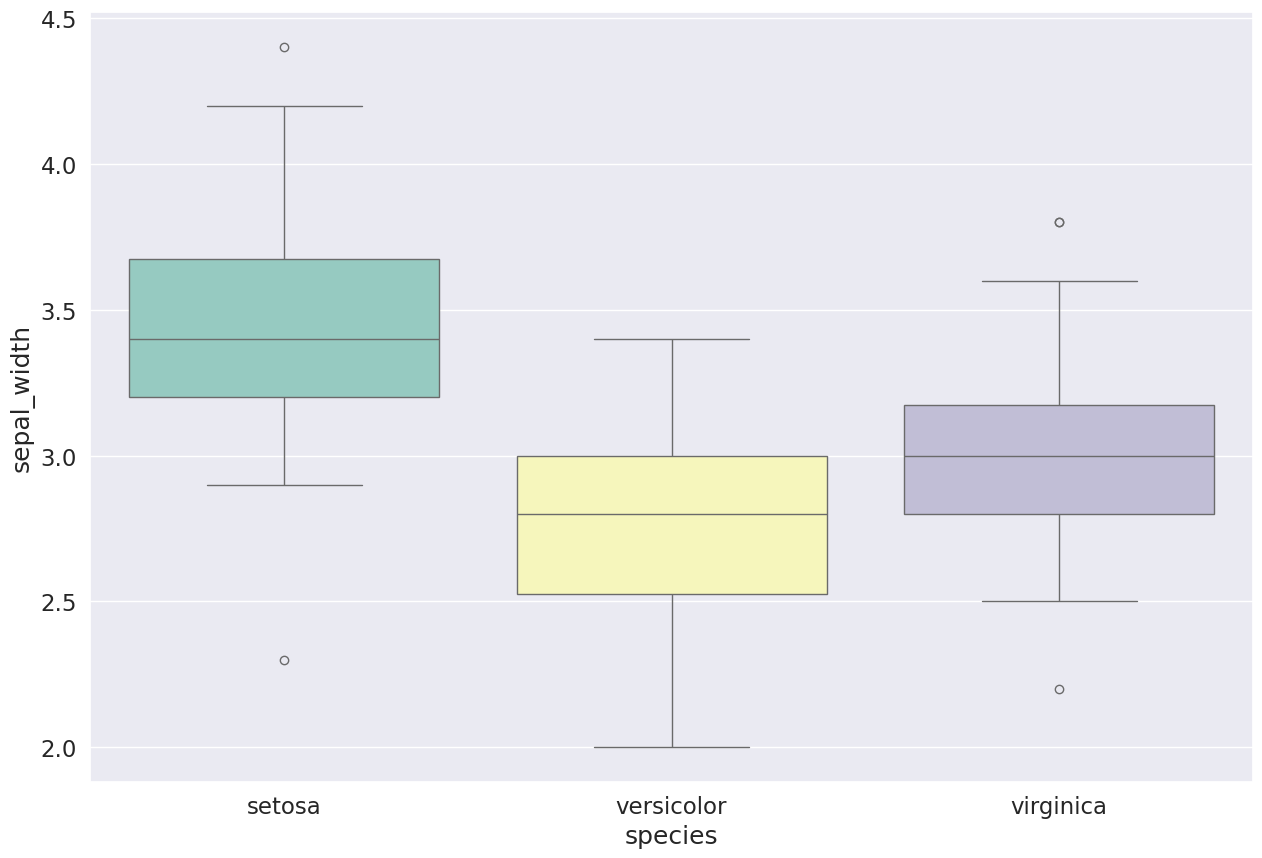

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x = iris['species'], y = iris['sepal_width'], palette="Set3")
sns.set(font_scale = 1.5)

<Axes: xlabel='petal_length', ylabel='count'>

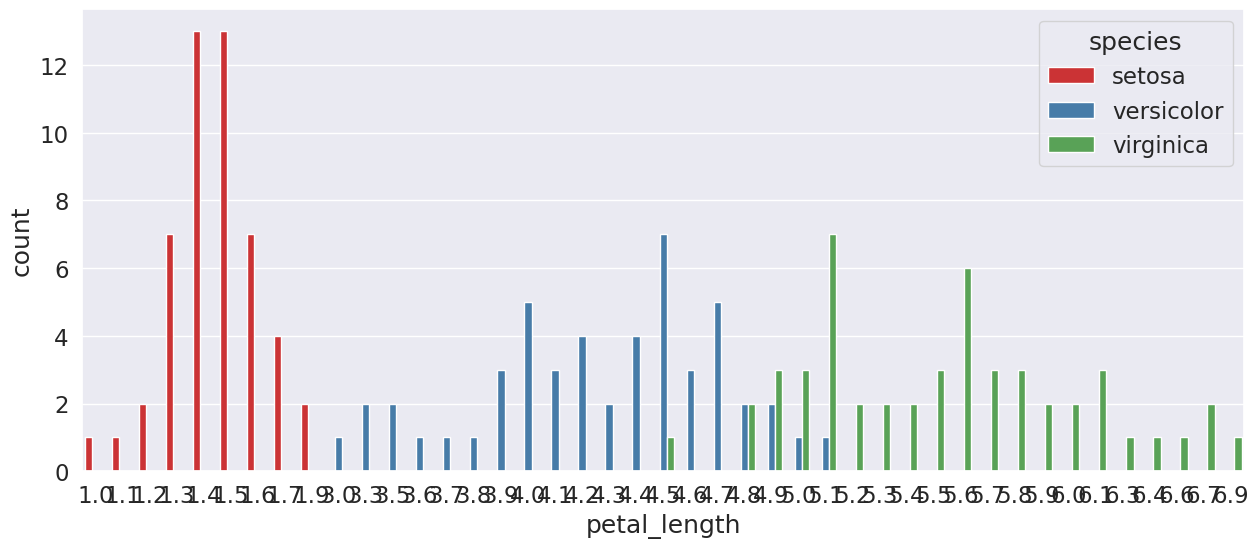

In [26]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'petal_length', hue = 'species', data = iris, palette = 'Set1')

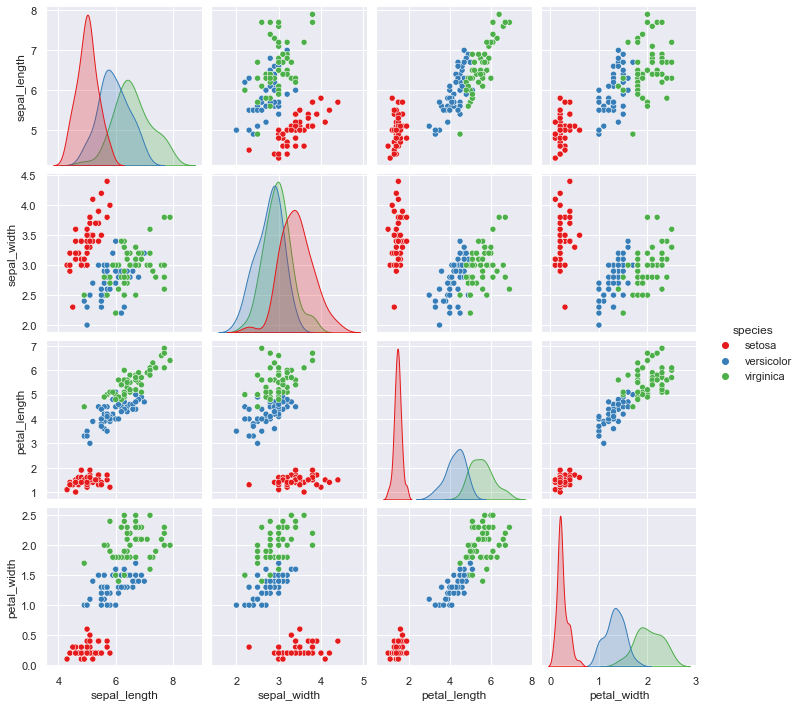

In [ ]:
sns.set(font_scale = 1)
sns.pairplot(data = iris, hue = 'species', diag_kind = 'kde', palette = 'Set1')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc              # building Logistic and Naive Bayes classifiers

In [28]:
from sklearn.model_selection import train_test_split
X = iris.drop('species', axis  = 1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(112, 4)
(38, 4)
112
38


In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
confusion = metrics.confusion_matrix(y_test,y_pred)
confusion


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

<Axes: >

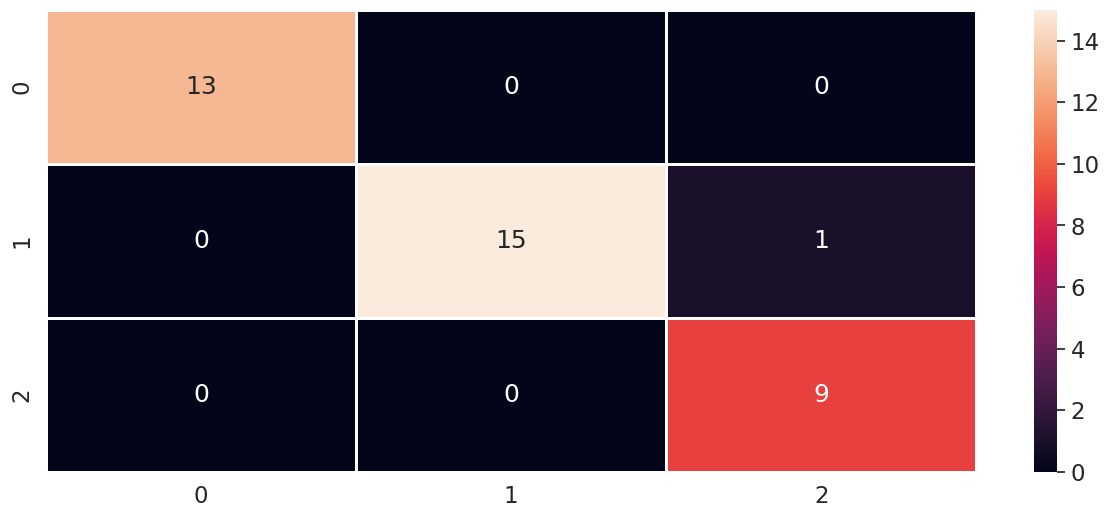

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(confusion, annot=True, linecolor='white', linewidths=1)

In [35]:
print('Accuracy of Logistic Regression is: ', model.score(X_test,y_test) * 100,'%')

Accuracy of Logistic Regression is:  97.36842105263158 %


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [37]:
metrics.f1_score(y_test, y_pred, average = 'weighted')

0.9739522830846216

In [38]:
# Naive Bayes CLassifier
nbModel = GaussianNB()

In [39]:
nbModel.fit(X_train, y_train)


GaussianNB()

In [40]:
nb_y_pred = nbModel.predict(X_test)

In [41]:
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

<Axes: >

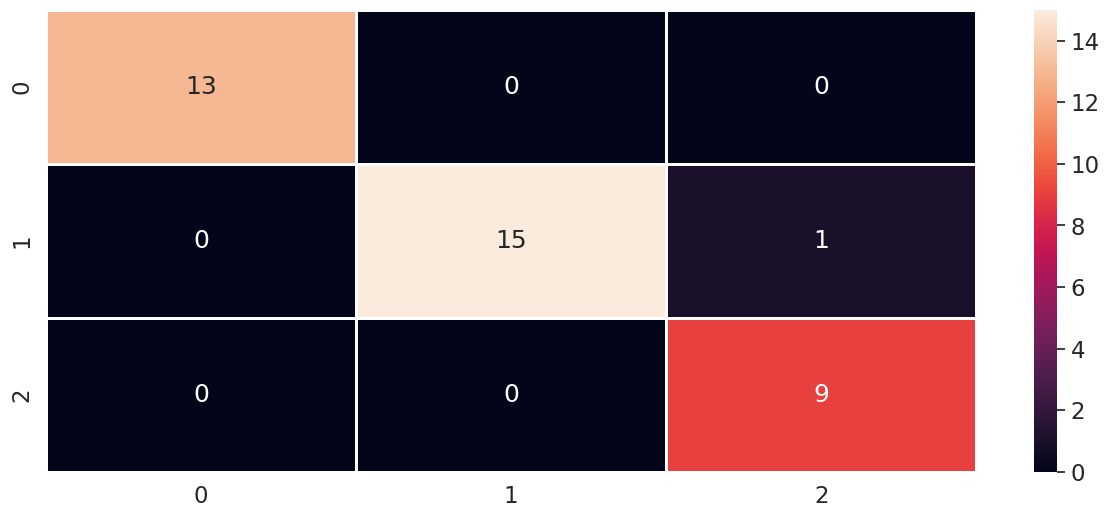

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True,  linecolor='white', linewidths=1)

In [43]:
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  97.36842105263158 %
